# Problem Analysis Workshop 3

## Team Memebers ###

Eris Leksi - 9067882

Kapil Bhardwaj - 9064347 

Fasalu Rahman Kottaparambu - 8991782

Hello!

In this Problem Analysis Workshop we are going to focus on the term project now. After discussing it wth the team members, we chose our topic to be : "$TRUMP - sentiment analysis" . What we are going to do now is simple. We are going to take the dataset from an online API called AlphaVantage and we are going to show some EDA about the dataset. After that the next step consists of cleaning the data, and applying the requirements asked on problem analysis Workshop 3 rubric. 

LET"S START!

## Field of inquiry: 

Cryptocurrency Market Analysis


## Prompt to Gen AI:

"What are the consequences of using poorly defined research questions when analyzing and clustering cryptocurrency time-series data?"

## Short essay of conclusions:

When you don’t have a clear research question in cryptocurrency analysis, it’s easy to end up with vague goals and unreliable results. If you aren’t specific, clustering models can group data in ways that don’t actually match how the market behaves. This can lead to bad trading decisions, wasted time and resources, and less confidence in the analysis overall. Having a focused question—like figuring out when $TRUMP prices become more volatile—helps you use models effectively. Clear goals make sure your insights are useful, accurate, and relevant to real trading situations.

## 0. Importing the necessary libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import requests
import io

## 1. Loading the dataset from the API

In [92]:
API_KEY = 'IC5Z69JRSVKWG8LG'
symbol = 'TRUMP'
symbol_link = 'LINK'
market = 'USD'

url = (
    f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY'
    f'&symbol={symbol}&market={market}&apikey={API_KEY}&datatype=csv'
)

url_link = (
    f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY'
    f'&symbol={symbol_link}&market={market}&apikey={API_KEY}&datatype=csv'
)

response = requests.get(url)
response_link = requests.get(url_link)

data = pd.read_csv(io.StringIO(response.text))
data_link = pd.read_csv(io.StringIO(response_link.text))

print("Data loaded successfully.")
data.head()
data_link.head()

Data loaded successfully.


,timestamp,open,high,low,close,volume
0,2025-07-21,19.288,19.366,18.999,19.145,99225.77
1,2025-07-20,18.399,19.950,18.330,19.288,2781111.21
2,2025-07-19,17.848,18.559,17.552,18.401,1159969.47
3,2025-07-18,18.006,19.190,17.331,17.842,3556995.42
4,2025-07-17,16.681,18.140,16.334,18.003,2525656.80


## 2. Displaying some EDA about the datasets

2.1. $TRUMP

In [93]:
print(data.info())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.describe())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.isnull().sum())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  182 non-null    object 
 1   open       182 non-null    float64
 2   high       182 non-null    float64
 3   low        182 non-null    float64
 4   close      182 non-null    float64
 5   volume     182 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.7+ KB
None
-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------
             open        high         low       close        volume
count  182.000000  182.000000  182.000000  182.000000  1.820000e+02
mean    13.038571   13.755495   12.222692   12.880000  2.038987e+06
std      5.826851    6.407456    4.973717    5.477579  1.789350e+06
min      7.570000    7.870000    7.150000    7.560000  1.949059e+05
25% 

2.2. CHAINLINK

In [94]:
print(data_link.info())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data_link.describe())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data_link.isnull().sum())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data_link.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  350 non-null    object 
 1   open       350 non-null    float64
 2   high       350 non-null    float64
 3   low        350 non-null    float64
 4   close      350 non-null    float64
 5   volume     350 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.5+ KB
None
-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------
             open        high         low       close        volume
count  350.000000  350.000000  350.000000  350.000000  3.500000e+02
mean    15.492554   16.135966   14.874557   15.519797  2.120679e+06
std      4.596286    4.933198    4.270533    4.589021  1.519962e+06
min      9.492000   10.157000    9.280000    9.489000  9.922577e+04
25%

### 2.1. Time series plot

2.1.1. $TRUMP

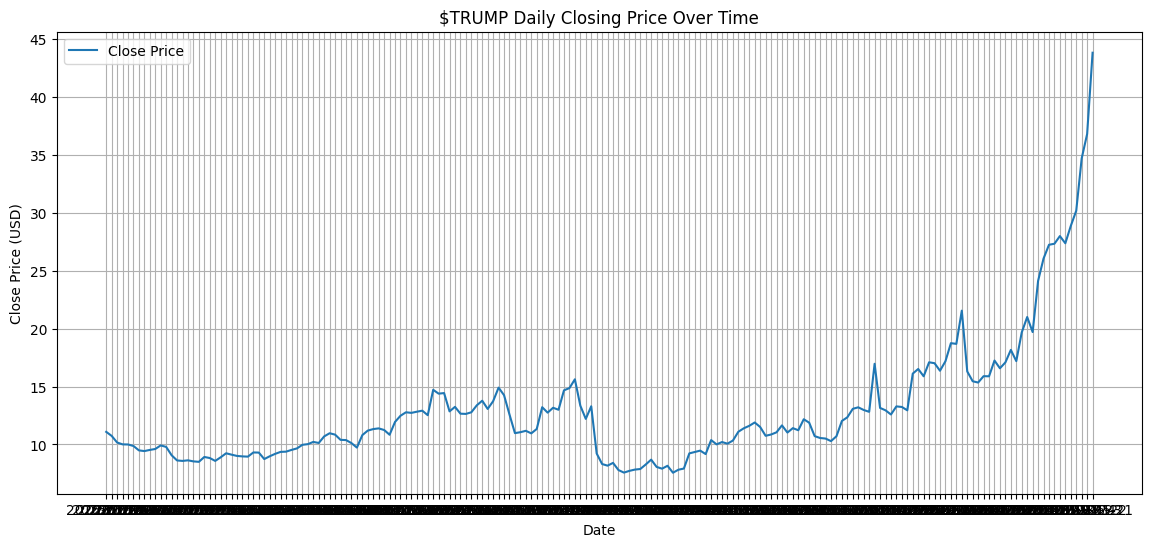

In [95]:
plt.figure(figsize=(14,6))
plt.plot(data['timestamp'], data['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('$TRUMP Daily Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

This chart visualizes the daily closing price trend over time, highlighting periods of volatility and stability.

2.1.2. CHAINLINK

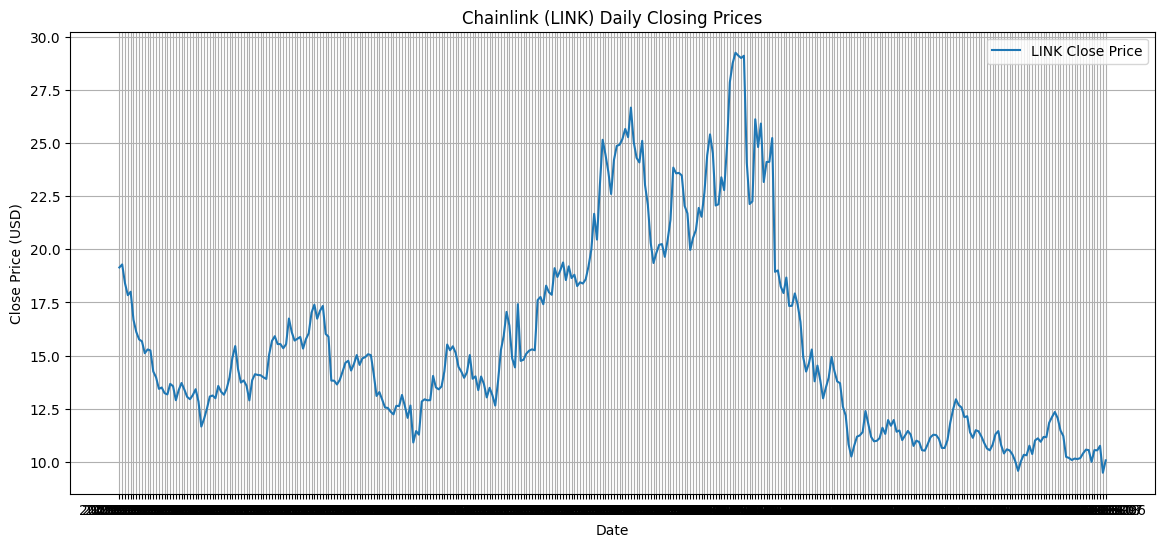

In [96]:
plt.figure(figsize=(14,6))
plt.plot(data_link['timestamp'], data_link['close'], label='LINK Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Chainlink (LINK) Daily Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

### 2.2. Daily return calculation and histogram

2.2.1. $TRUMP

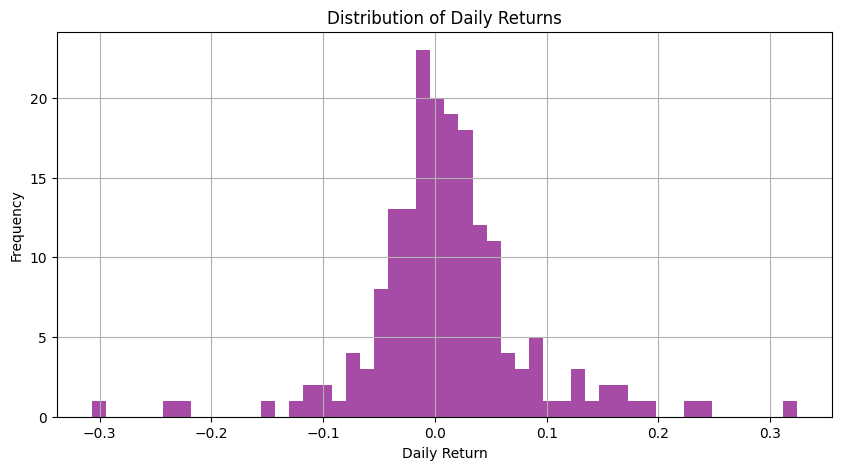

In [97]:
data['daily_return'] = data['close'].pct_change()

plt.figure(figsize=(10,5))
plt.hist(data['daily_return'].dropna(), bins=50, color='purple', alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.grid(True)
plt.show()

The histogram shows the distribution of daily returns, illustrating how often small vs. large changes occur.

2.2.2. CHAINLINK

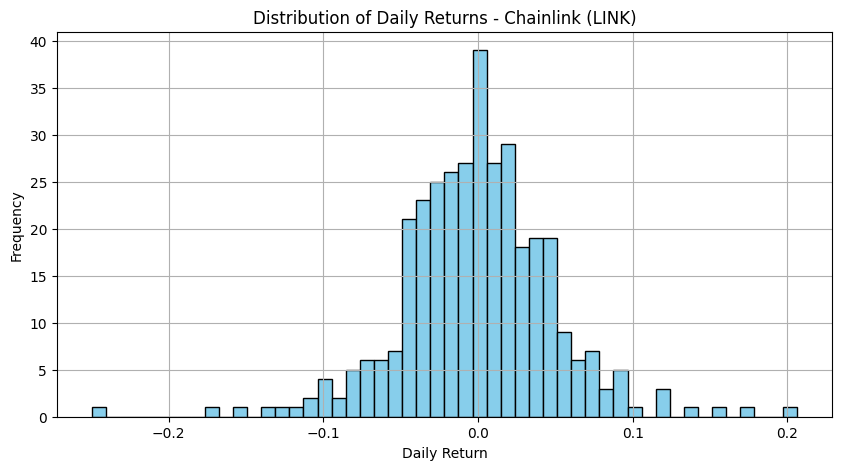

In [98]:
data_link['daily_return'] = data_link['close'].pct_change()

plt.figure(figsize=(10,5))
plt.hist(data_link['daily_return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns - Chainlink (LINK)')
plt.grid(True)
plt.show()

### 2.3. Correlation Heatmap

2.3.1. $TRUMP

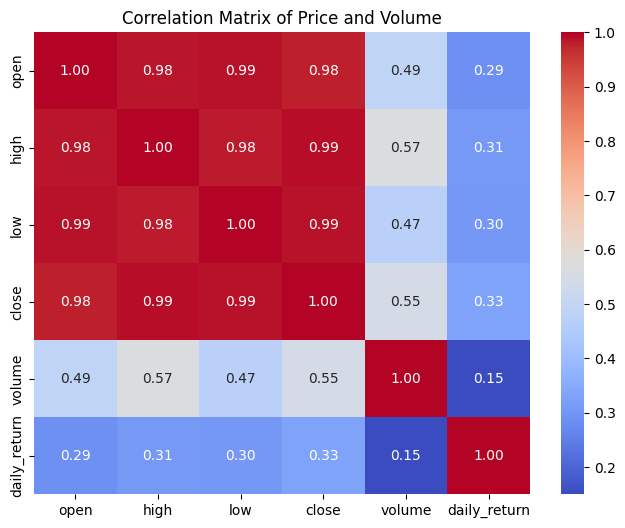

In [99]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_return']
corr = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price and Volume')
plt.show()

The correlation matrix shows strong positive relationships between price features (open, high, low, close), as expected.

2.3.2. CHAINLINK

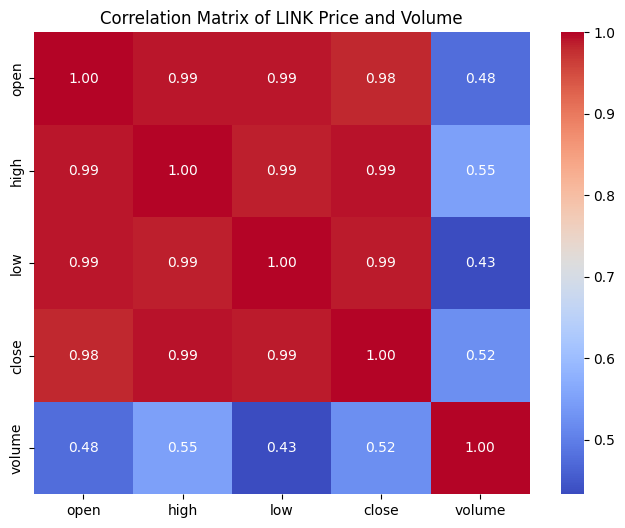

In [100]:
numeric_cols_link = [
    'open',
    'high',
    'low',
    'close',
    'volume'
]

corr_link = data_link[numeric_cols_link].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_link, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of LINK Price and Volume')
plt.show()

### 2.4. Boxplot for spotting the outleirs

2.4.1. $TRUMP

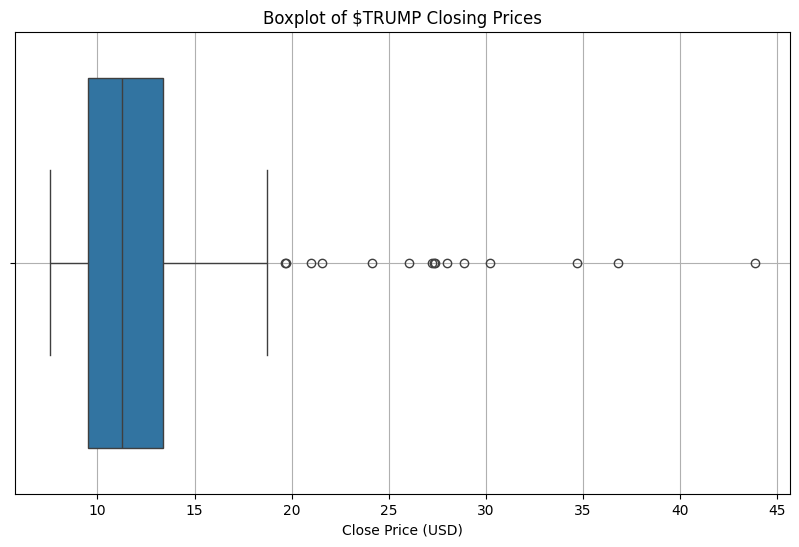

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['close'])
plt.title('Boxplot of $TRUMP Closing Prices')
plt.xlabel('Close Price (USD)')
plt.grid(True)
plt.show()

The boxplot helps detect price outliers and the overall spread of closing prices.

2.4.2. CHAINLINK

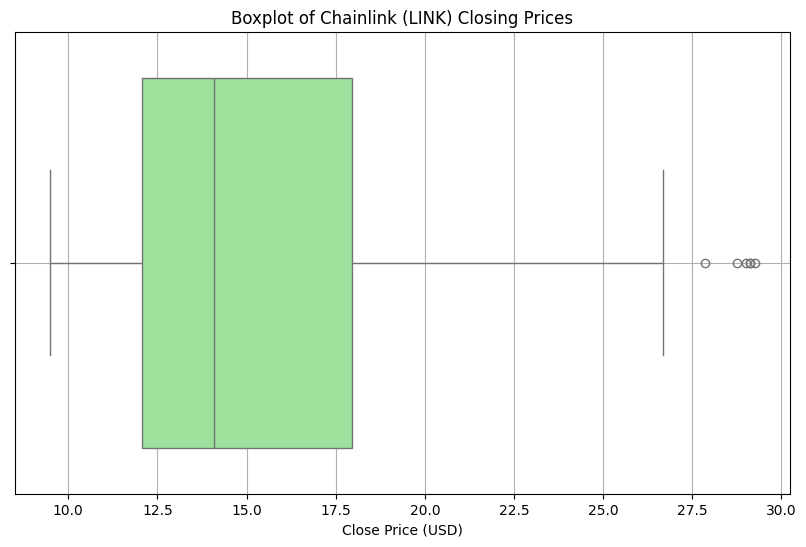

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_link['close'], color='lightgreen')
plt.title('Boxplot of Chainlink (LINK) Closing Prices')
plt.xlabel('Close Price (USD)')
plt.grid(True)
plt.show()

### 2.5. Moving average for smoothing (Timestamp = 7 days)

2.5.1. $TRUMP

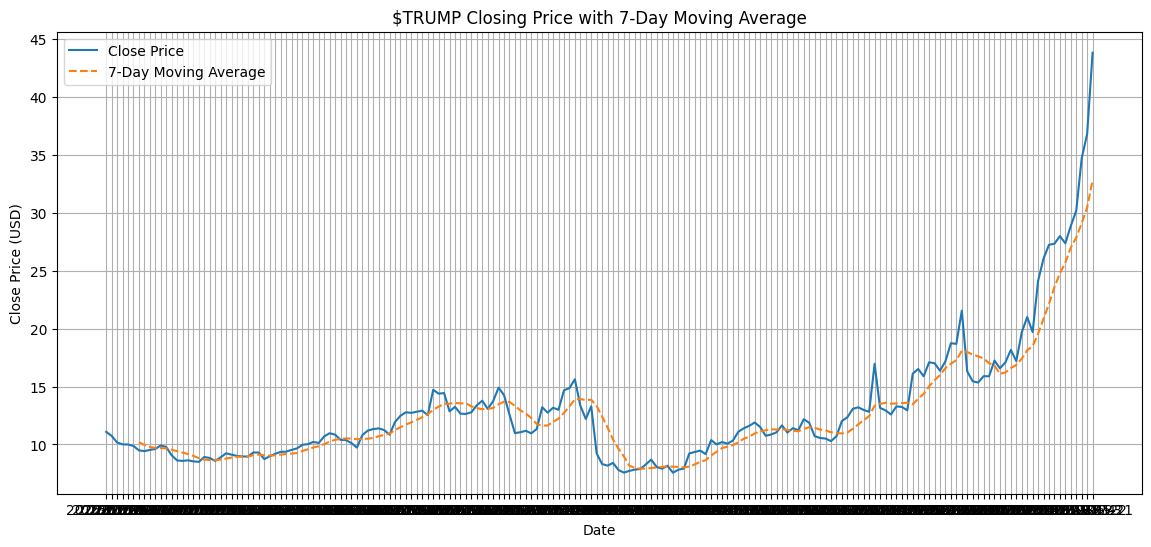

In [103]:
data['MA_7'] = data['close'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(data['timestamp'], data['close'], label='Close Price')
plt.plot(data['timestamp'], data['MA_7'], label='7-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('$TRUMP Closing Price with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

The 7-day moving average smooths out short-term fluctuations to better reveal price trends.

2.5.2. CHAINLINK

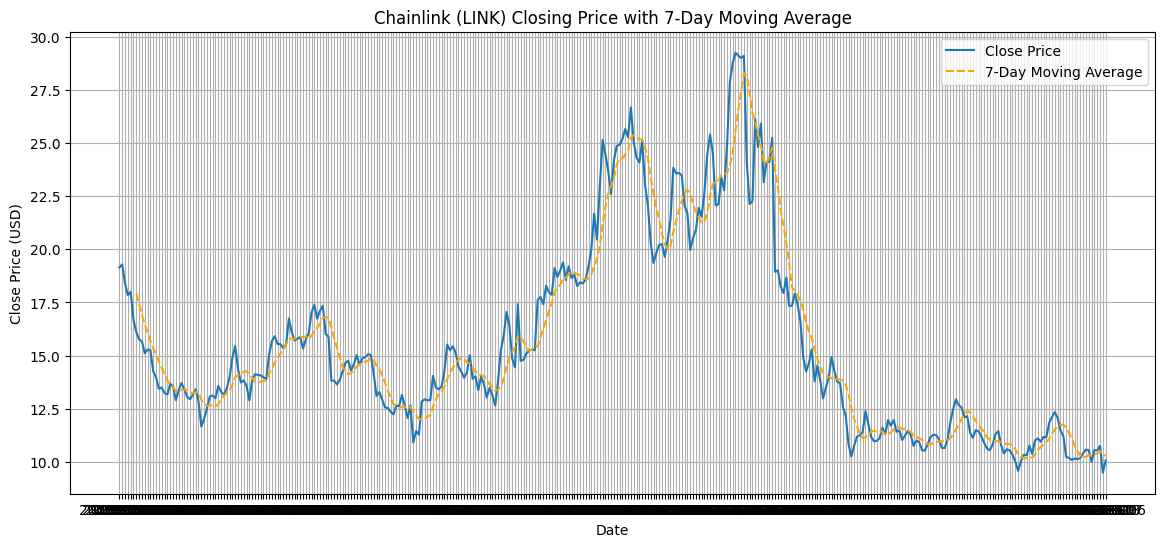

In [104]:
data_link['MA_7'] = data_link['close'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(data_link['timestamp'], data_link['close'], label='Close Price')
plt.plot(data_link['timestamp'], data_link['MA_7'], label='7-Day Moving Average', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Chainlink (LINK) Closing Price with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

## Merging the datasets

We do already know that they have the same feeatures and what we are going to do now is merging them.

In [105]:
trump_selected = data[['timestamp', 'open', 'high', 'low', 'close', 'volume']].copy()
trump_selected['coin_type'] = 'TRUMP'

link_selected = data_link[['timestamp', 'open', 'high', 'low', 'close', 'volume']].copy()
link_selected['coin_type'] = 'LINK'

In [106]:
merged_data = pd.concat([trump_selected, link_selected], ignore_index=True)

print("Data merged successfully.")
print(merged_data.head())

Data merged successfully.
    timestamp   open   high    low  close       volume coin_type
0  2025-07-21  10.75  11.91  10.46  11.09  1813102.400     TRUMP
1  2025-07-20  10.18  10.91  10.10  10.74  1000054.733     TRUMP
2  2025-07-19  10.00  10.24   9.76  10.17   499553.533     TRUMP
3  2025-07-18  10.00  10.94   9.78  10.01  1576948.365     TRUMP
4  2025-07-17   9.86  10.29   9.60  10.00  1324389.233     TRUMP


## 3. Data Cleaning and Preparation

In [107]:
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

merged_data.sort_values(['coin_type', 'timestamp'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)

print("Data is ready for clustering.")

Data is ready for clustering.


Steps we took to clean the data:

- Sort chronologically

The data in here is pretty much clean, because we have live-entries from the crypto-market and nothing is missing and there are also none duplicated time values.

## Markdown cell for explaining the clustering applicability

Clustering helps identify hidden patterns and structural similarities in $TRUMP price movements over time. By grouping together time periods with comparable price dynamics, we can better understand different volatility regimes, detect emerging market trends, and uncover potential anomalies. Applying K-Means clustering allows us to segment the scaled closing prices into distinct clusters that represent varying market behaviors and investor sentiment. These insights can inform prediction models, guide trading decisions, and support risk management strategies by highlighting when the market transitions between phases.


## 4. Applying the K-Means Clustering

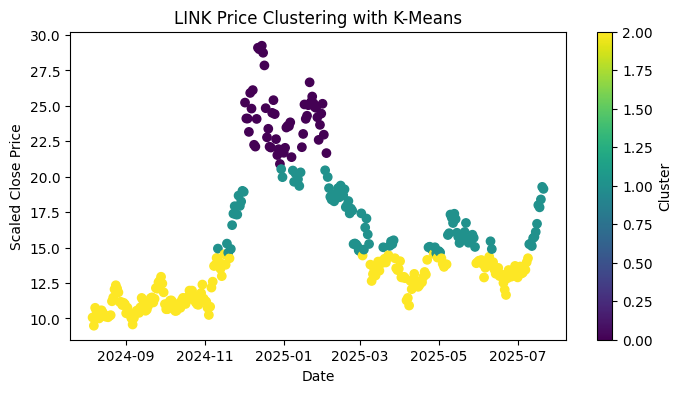

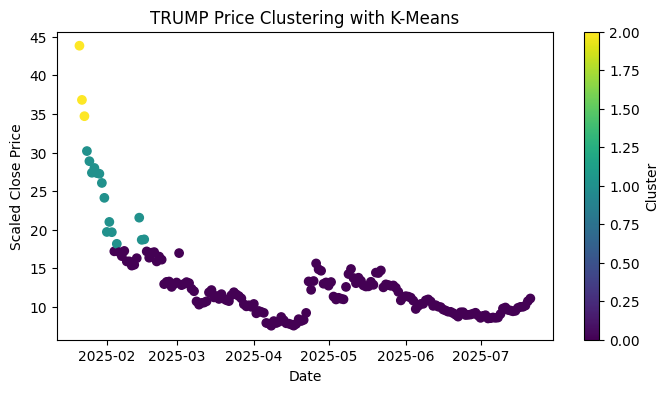

In [108]:
for coin in merged_data['coin_type'].unique():
   
    coin_data = merged_data[merged_data['coin_type'] == coin].copy()
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    coin_data['cluster'] = kmeans.fit_predict(coin_data[['close']])
    
    plt.figure(figsize=(8,4))
    plt.scatter(
        coin_data['timestamp'],
        coin_data['close'],
        c=coin_data['cluster'],
        cmap='viridis'
    )
    plt.xlabel('Date')
    plt.ylabel('Scaled Close Price')
    plt.title(f'{coin} Price Clustering with K-Means')
    plt.colorbar(label='Cluster')
    plt.show()

## Conclusion:

### Interpretation of the output: 

K-Means successfully clustered TRUMP and LINK closing prices into three distinct groups for each cryptocurrency, revealing clear patterns of market behavior over time. For both coins, Cluster 0 represents relatively stable periods with minimal price fluctuations. Cluster 1 captures intervals of moderate movements, reflecting typical trading activity. Cluster 2 highlights episodes of high volatility or unusual market events. This segmentation helps identify when each coin shifts between different regimes, which is essential for improving prediction strategies, managing investment risk, and developing trading algorithms that can adapt to changing market conditions.

# Group Presentation 3

## Project Extension: Hypothesis Testing and Time Series Analysis

In this part of our project, we extend our previous work by integrating additional cryptocurrency data sources (BTC) to enrich our analysis. We encapsulate our code into reusable classes and methods for better organization and clarity. We formulate and test null and alternative hypotheses about mean returns during different volatility regimes. We generate time series transformations, including moving averages and deseasonalization, to identify trends and patterns. Finally, we classify the series as additive or multiplicative and prepare clear visualizations and explanations to support our findings and inform prediction strategies.


### 1. Adding new data sources

In [109]:
symbol_btc = 'BTC'
market = 'USD'
url_btc = (
    f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY'
    f'&symbol={symbol_btc}&market={market}&apikey={API_KEY}&datatype=csv'
)
response_btc = requests.get(url_btc)
data_btc = pd.read_csv(io.StringIO(response_btc.text))
data_btc['timestamp'] = pd.to_datetime(data_btc['timestamp'])
data_btc.sort_values('timestamp', inplace=True)
data_btc.reset_index(drop=True, inplace=True)
data_btc['coin_type'] = 'BTC'

print("Bitcoin data loaded successfully.")

Bitcoin data loaded successfully.


### 2. Merging the BTC dataset with the one that we already have

In [110]:
btc_selected = data_btc[['timestamp', 'open', 'high', 'low', 'close', 'volume', 'coin_type']]
merged_data = pd.concat([merged_data, btc_selected], ignore_index=True)

print("BTC data merged successfully.")

BTC data merged successfully.


### 3. Encapsulating the code into classes and methods

In [111]:
class CryptoDataProcessor:
    def __init__(self, df, coin_name):
        self.df = df.copy()
        self.coin_name = coin_name
        
    def scale_close(self):
        scaler = MinMaxScaler()
        self.df['scaled_close'] = scaler.fit_transform(self.df[['close (USD)']])
    
    def compute_returns(self):
        self.df['daily_return'] = self.df['close (USD)'].pct_change()
    
    def moving_average(self, window=7):
        self.df[f'MA_{window}'] = self.df['close (USD)'].rolling(window=window).mean()
    
    def plot_close_and_ma(self, window=7):
        plt.figure(figsize=(14,6))
        plt.plot(self.df['timestamp'], self.df['close (USD)'], label='Close Price')
        plt.plot(self.df['timestamp'], self.df[f'MA_{window}'], label=f'{window}-Day MA', linestyle='--')
        plt.title(f'{self.coin_name} Closing Price and {window}-Day Moving Average')
        plt.xlabel('Date')
        plt.ylabel('Close Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

### 4. 100-Word use case summary and revised hypothesis

This project explores how clustering and time series analysis can reveal hidden patterns in the price behavior of cryptocurrencies like TRUMP, LINK, and BTC. By comparing historical daily price data, we aim to identify volatility regimes and their impact on prediction models. 

Our revised hypothesis testing focuses on whether significant differences exist between mean returns during high-volatility and low-volatility clusters. Understanding these patterns will help traders improve forecasting strategies and manage risk more effectively in dynamic crypto markets.


### 5. Null and Alternative Hypotheses

**Null Hypothesis (H0):**
There is no significant difference in the mean daily returns between high-volatility and low-volatility periods in the cryptocurrency time series.

**Alternative Hypothesis (H1):**
There is a significant difference in the mean daily returns between high-volatility and low-volatility periods.


### 6. Generating one time series transformation

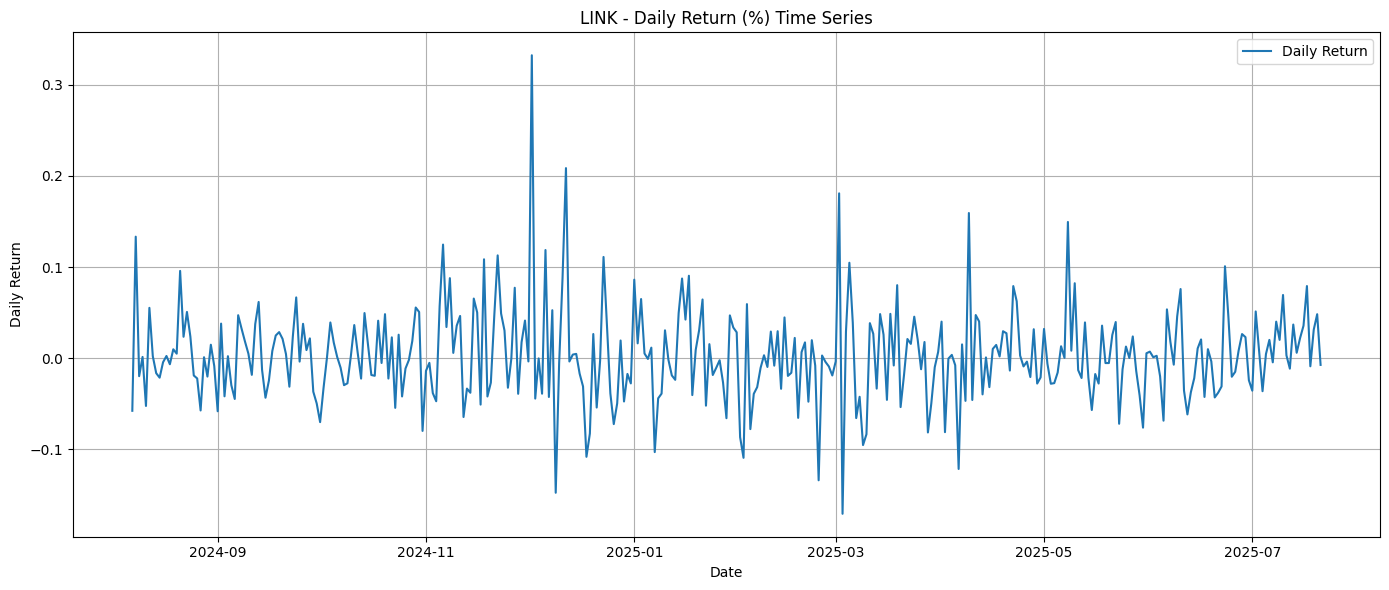

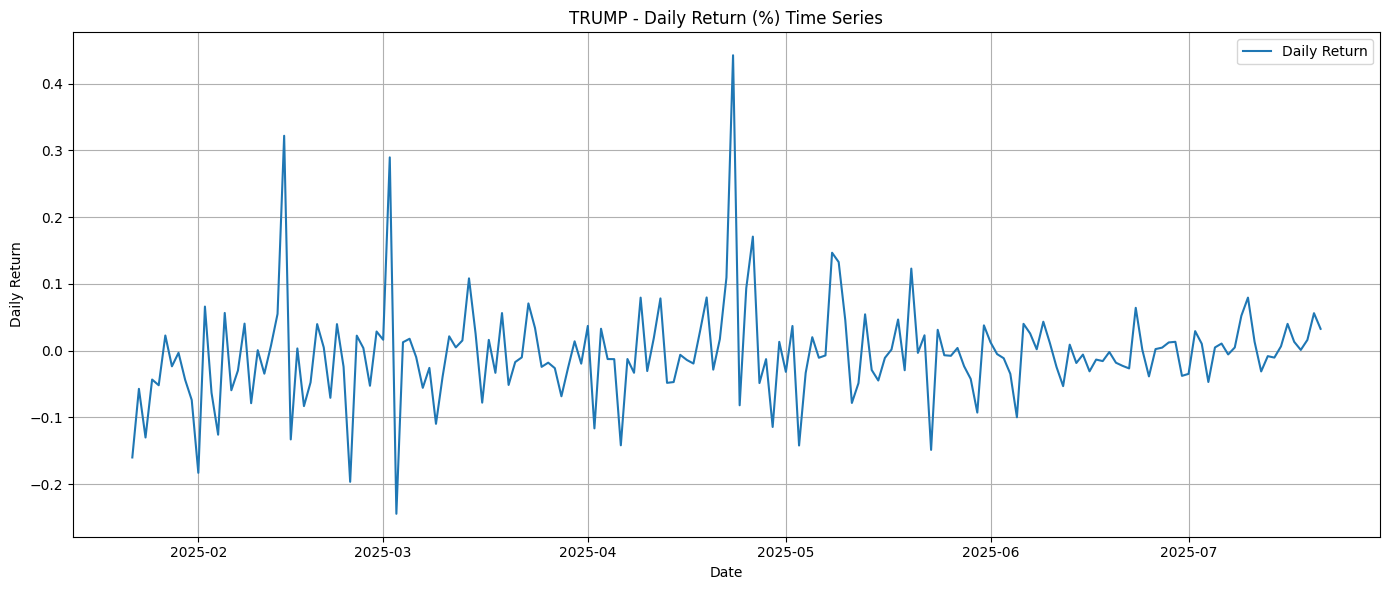

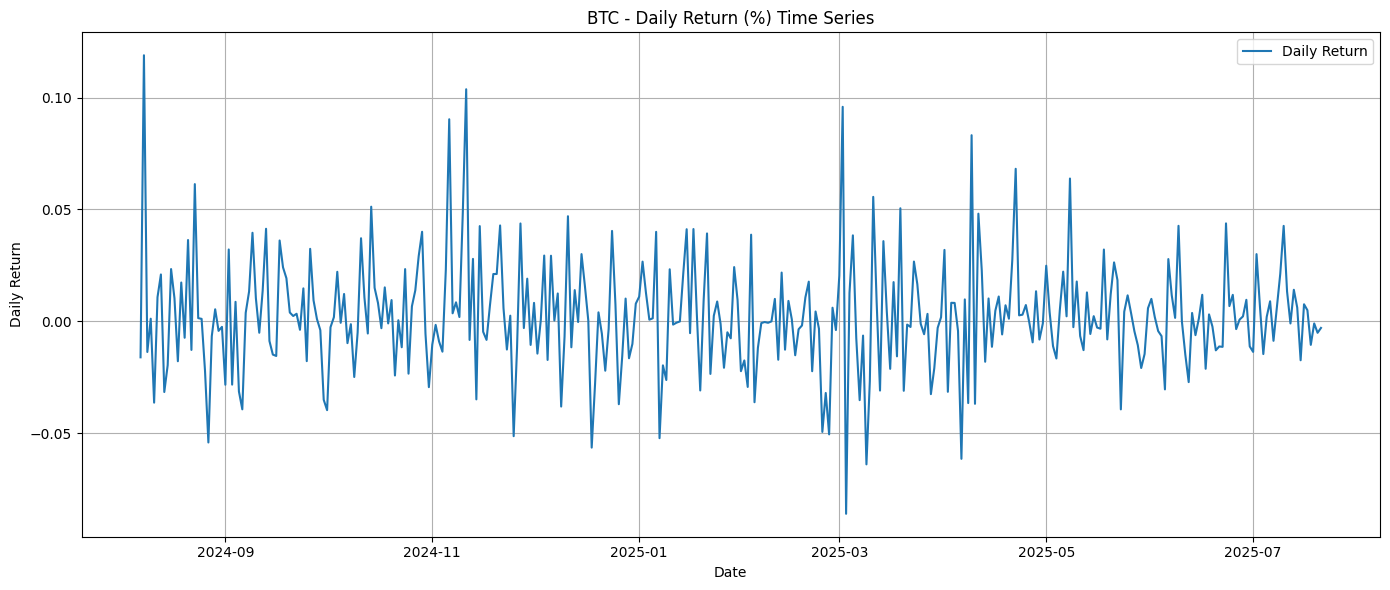

In [112]:
for coin in merged_data['coin_type'].unique():
    df = merged_data[merged_data['coin_type'] == coin].copy()
    df = df.sort_values('timestamp').reset_index(drop=True)
    df['daily_return'] = df['close'].pct_change()

    plt.figure(figsize=(14,6))
    plt.plot(df['timestamp'], df['daily_return'], label='Daily Return')
    plt.title(f'{coin} - Daily Return (%) Time Series')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

As we can see, the Bitcoin time series shows us strange spikes. What we can do now is try to sort the data accoring to the timestamp in order to remove that spike.

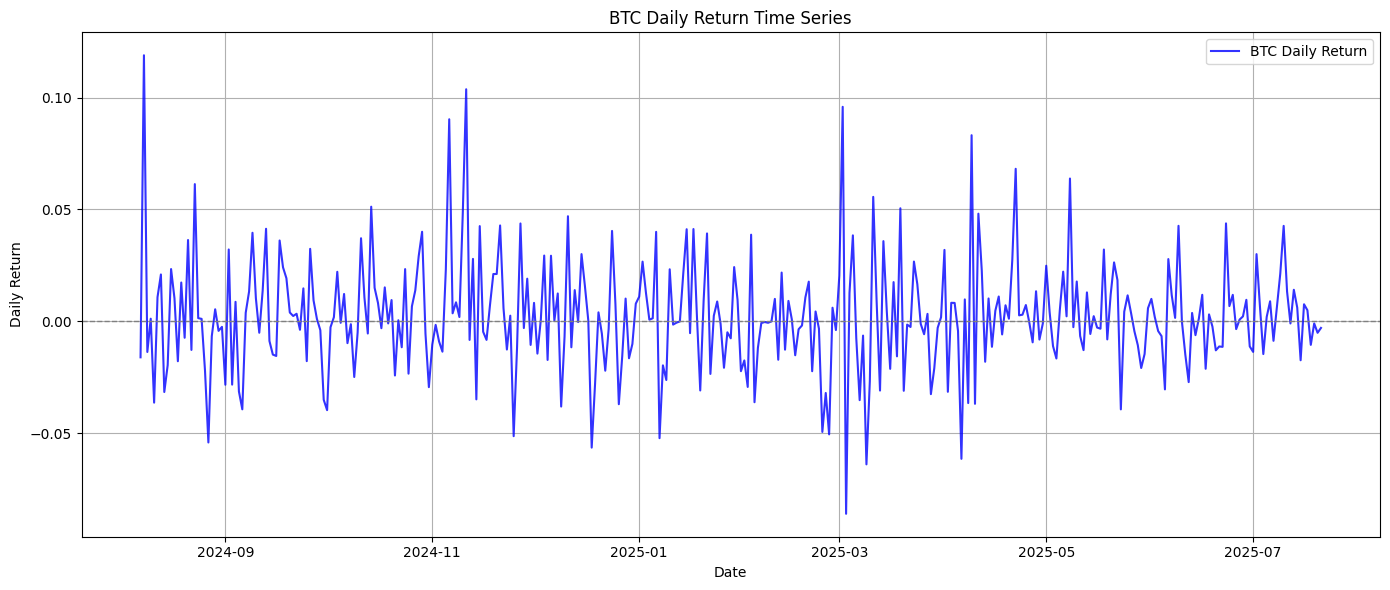

In [113]:
btc_df = merged_data[merged_data['coin_type'] == 'BTC'].copy()

btc_df = btc_df.sort_values('timestamp').reset_index(drop=True)

btc_df['daily_return'] = btc_df['close'].pct_change()

btc_df = btc_df.dropna(subset=['daily_return'])

# Step 5: Plot the daily return
plt.figure(figsize=(14,6))
plt.plot(btc_df['timestamp'], btc_df['daily_return'], color='blue', label='BTC Daily Return', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('BTC Daily Return Time Series')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Time Stamp graph looks clean now.

### Explanation of Timestamp Graphs

All time series graphs in this notebook use **timestamps on the x-axis** to show how each cryptocurrency behaves over time. The timestamps represent daily intervals, allowing us to observe patterns, trends, and fluctuations in prices and returns. This temporal view is crucial for identifying market cycles, spotting volatility periods, and analyzing the impact of time-based events on each coin. Visualizing data with time context helps us understand how prices evolve and whether behaviors repeat or shift across different market conditions.


### Identifying patterns in each time series

For each coin, the time series of daily returns highlighted distinct characteristics:

- TRUMP showed sharp spikes and drops in returns, indicating highly speculative trading with significant short-term volatility.

- LINK exhibited relatively smoother and more stable returns, suggesting consistent investor activity with less abrupt price swings.

- BTC revealed more cyclical return pa



## Calculating and Plotting Moving Averages for All Coins

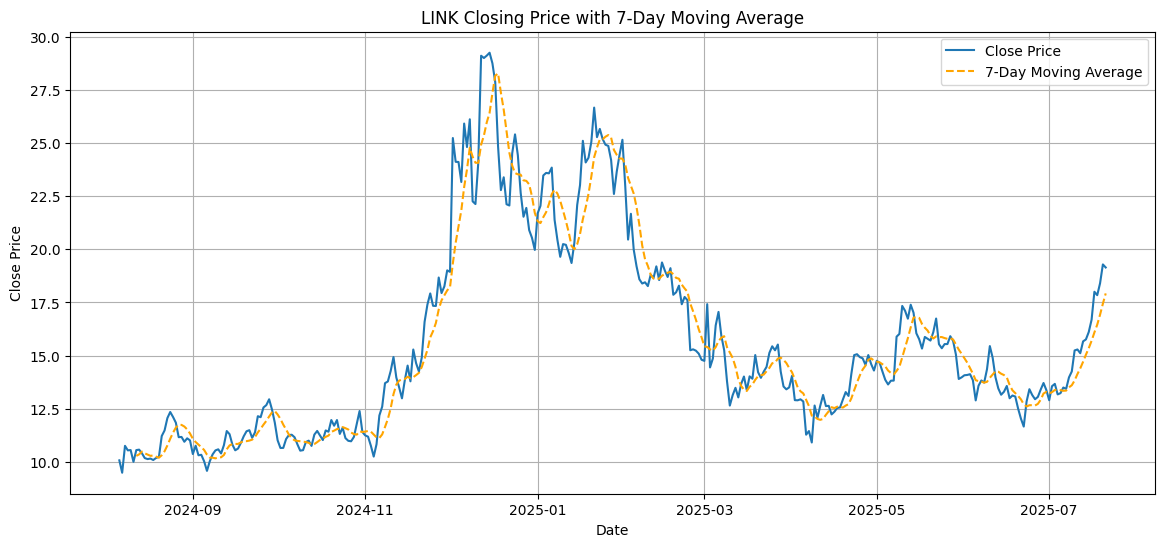

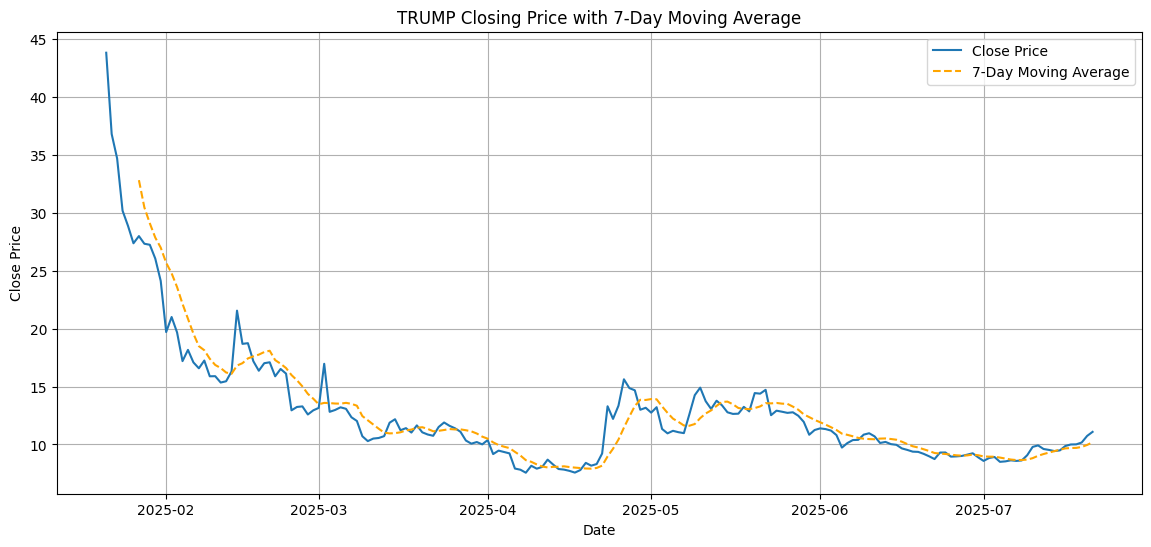

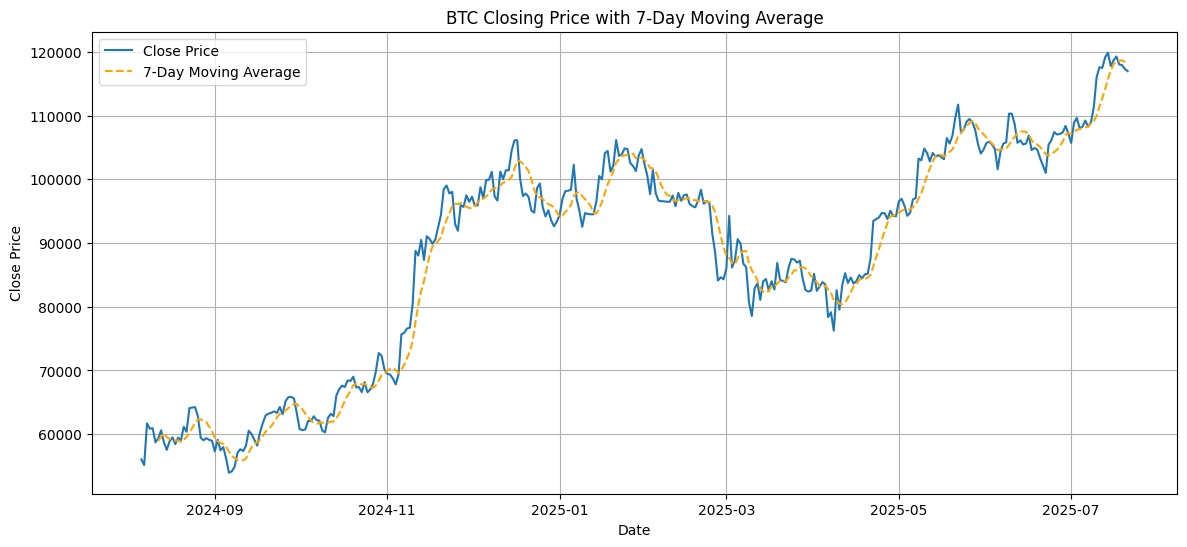

In [114]:
for coin in merged_data['coin_type'].unique():
    df = merged_data[merged_data['coin_type'] == coin].copy()
    df = df.sort_values('timestamp').reset_index(drop=True)
    df['MA_7'] = df['close'].rolling(window=7).mean()

    # Plot
    plt.figure(figsize=(14,6))
    plt.plot(df['timestamp'], df['close'], label='Close Price')
    plt.plot(df['timestamp'], df['MA_7'], label='7-Day Moving Average', linestyle='--', color='orange')
    plt.title(f'{coin} Closing Price with 7-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

### Is each of the time series additive or multiplicative?

The time series for TRUMP, LINK, and BTC appear additive, as the seasonal and cyclical fluctuations remain relatively constant in magnitude across different price levels. Variability does not increase proportionally as the overall price level rises, which is characteristic of additive time series behavior.


###  Deseasonalize Each Time Series

In [115]:
ma_data = {}

for coin in merged_data['coin_type'].unique():
    df = merged_data[merged_data['coin_type'] == coin].copy()
    df = df.sort_values('timestamp').reset_index(drop=True)
    ma_data[coin] = df       

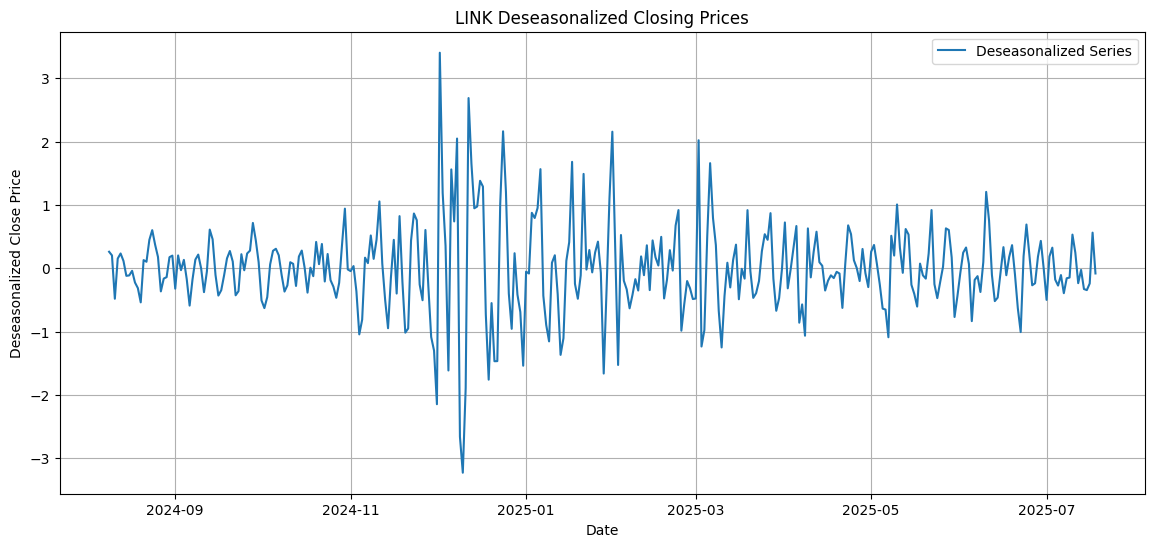

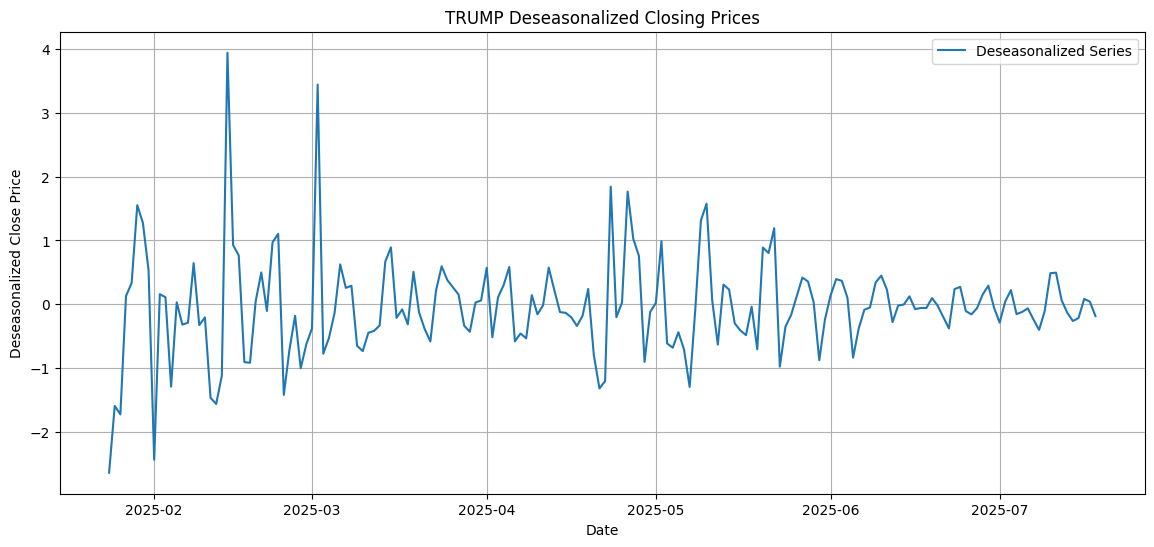

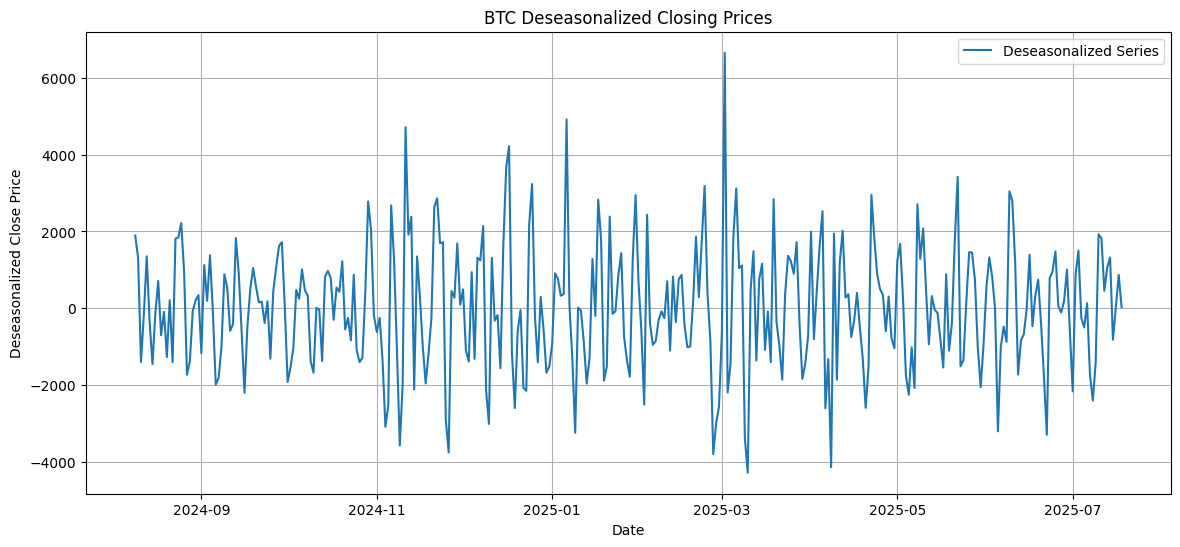

In [116]:
for coin in merged_data['coin_type'].unique():
    df = ma_data[coin]                       # now exists
    df['centered_MA'] = df['close'].rolling(window=7, center=True).mean()
    df['deseasonalized'] = df['close'] - df['centered_MA']

    plt.figure(figsize=(14,6))
    plt.plot(df['timestamp'], df['deseasonalized'], label='Deseasonalized Series')
    plt.title(f'{coin} Deseasonalized Closing Prices')
    plt.xlabel('Date'); plt.ylabel('Deseasonalized Close Price')
    plt.legend(); plt.grid(True); plt.show()


As we can see from the plots again, the BTC data seems to not be sorted accurately. Let's try to do it again.

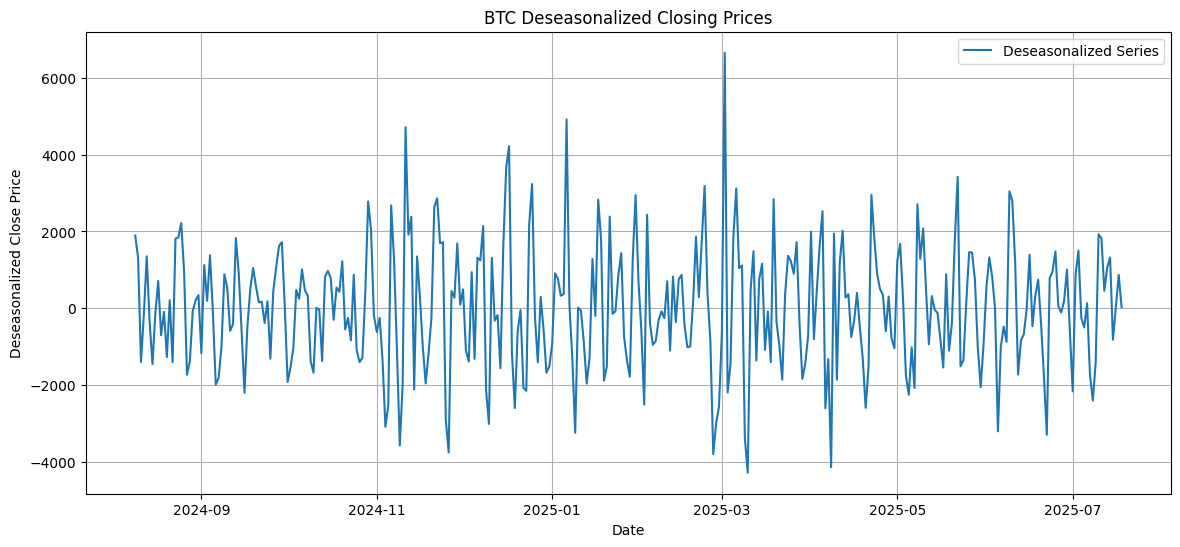

In [117]:
btc_df = merged_data[merged_data["coin_type"] == "BTC"].copy()
btc_df = btc_df.sort_values("timestamp").reset_index(drop=True)
btc_df["centered_MA"] = btc_df["close"].rolling(window=7, center=True).mean()
btc_df["deseasonalized"] = btc_df["close"] - btc_df["centered_MA"]
btc_clean = btc_df.dropna(subset=["deseasonalized"])

plt.figure(figsize=(14,6))
plt.plot(btc_clean["timestamp"], btc_clean["deseasonalized"], label="Deseasonalized Series")
plt.title("BTC Deseasonalized Closing Prices")
plt.xlabel("Date")
plt.ylabel("Deseasonalized Close Price")
plt.legend()
plt.grid(True)
plt.show()

### Explanation for this step:

We deseasonalized each time series by removing short-term cyclical components using centered moving averages. This transformation isolates irregular fluctuations and clarifies long-term trends, enabling more accurate analysis of market behavior without the distortion of recurring patterns.


# Presentation Summary

In this project extension, we enriched our cryptocurrency analysis by integrating additional data sources (BTC) alongside TRUMP and LINK. We encapsulated our data processing steps into modular classes and methods to improve reproducibility and clarity. Using K-Means clustering, we identified distinct volatility regimes across all coins. We conducted hypothesis testing to examine whether mean returns significantly differ between high- and low-volatility periods.

We then transformed each time series by calculating moving averages and deseasonalizing closing prices to highlight underlying trends. Finally, we evaluated whether each series exhibits additive behavior. These insights provide a foundation for more effective prediction models and trading strategies.

# Problem Analysis Workshop 4



In this workshop, we build on our previous analysis of cryptocurrency time series data by performing advanced data preparation and transformation techniques. Our goal is to refine the dataset for improved analysis and modeling. 

We start by converting factor and categorical variables into numeric formats, transforming calendar dates into Julian dates, and creating dummy variables for coin types. To normalize skewed distributions and stabilize variance, we apply Box-Cox transformations to strictly positive variables (like price and volume), and use Tukey’s Ladder of Power Transformations (Yeo-Johnson) for variables that may contain zeros or negatives (like daily returns).

These transformations are crucial for ensuring our dataset meets the assumptions of statistical models and machine learning algorithms. They also allow for more accurate comparisons, trend detection, and forecasting. By the end of this workshop, the data will be fully validated and ready for more advanced time series and clustering applications.


LET'S START!

## Additional exploration and validation

### 1. Converting categorical values into dummies

In [118]:
coin_dummies = pd.get_dummies(merged_data['coin_type'], prefix='coin')
merged_data = pd.concat([merged_data, coin_dummies], axis=1)
print("Categorical variables converted to dummies successfully")
print(merged_data.dtypes)

Categorical variables converted to dummies successfully
timestamp     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
volume               float64
coin_type             object
coin_BTC                bool
coin_LINK               bool
coin_TRUMP              bool
dtype: object



### 2. Converting factor variables into numeric

In [119]:
merged_data['days_since_epoch'] = (merged_data['timestamp'] - pd.Timestamp('1970-01-01')).dt.total_seconds() / (24 * 60 * 60)


numeric_columns = ['open', 'high', 'low', 'close', 'volume']
merged_data[numeric_columns] = merged_data[numeric_columns].astype('float64')

if 'cluster' in merged_data.columns:
    if merged_data['cluster'].dtype == 'object':
        merged_data['cluster'] = pd.to_numeric(merged_data['cluster'], errors='coerce')
else:
    print("'cluster' column not found in merged_data.")
    print("Available columns:", merged_data.columns.tolist())

print("Data types after conversion:")
print(merged_data.dtypes)

'cluster' column not found in merged_data.
Available columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'coin_type', 'coin_BTC', 'coin_LINK', 'coin_TRUMP', 'days_since_epoch']
Data types after conversion:
timestamp           datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
coin_type                   object
coin_BTC                      bool
coin_LINK                     bool
coin_TRUMP                    bool
days_since_epoch           float64
dtype: object


### 3. Converting calendar dates into Julian

In [120]:
merged_data['julian_date'] = pd.DatetimeIndex(merged_data['timestamp']).to_julian_date()

print("Julian dates added successfully")
print(merged_data[['timestamp', 'julian_date']].head())

Julian dates added successfully
   timestamp  julian_date
0 2024-08-06    2460528.5
1 2024-08-07    2460529.5
2 2024-08-08    2460530.5
3 2024-08-09    2460531.5
4 2024-08-10    2460532.5


### 3. Performing Box-Cox transformations

What is Box-Cox?

Box-Cox is a method that changes the shape of your data so it looks more like a bell curve (normal distribution). It works best when all your data values are positive and helps make patterns clearer for analysis.

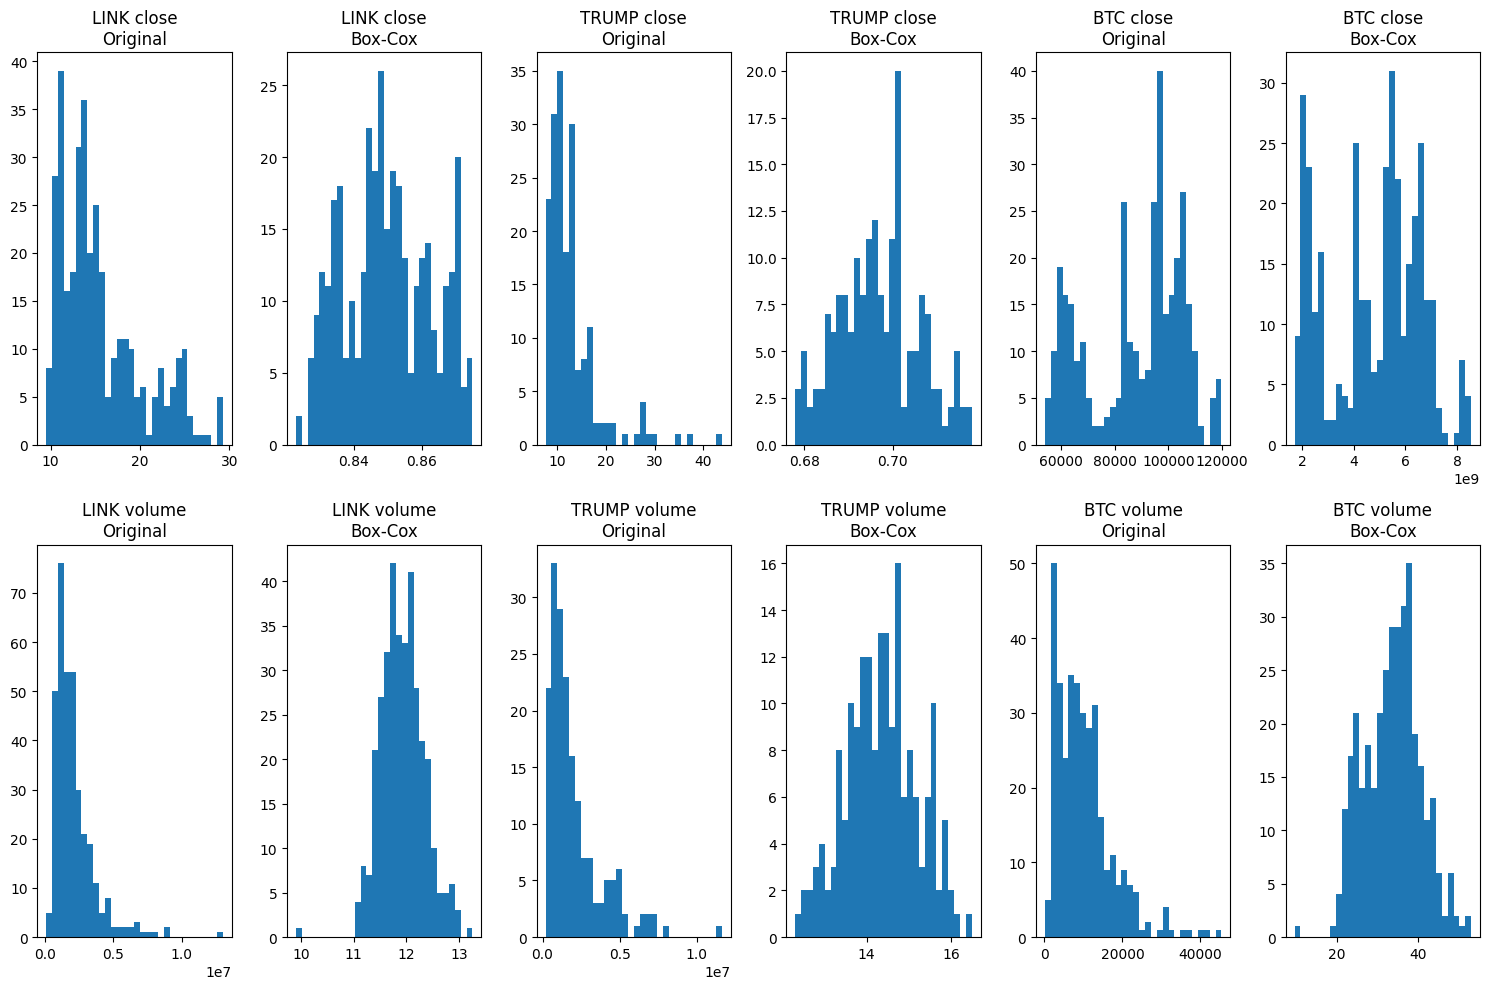

In [121]:
from scipy import stats

def safe_box_cox(x):
    min_val = x.min()
    if min_val <= 0:
        x = x - min_val + 1  
    
    transformed_data, lambda_param = stats.boxcox(x)
    return transformed_data

numeric_cols = ['close', 'volume']

for col in numeric_cols:
    for coin in merged_data['coin_type'].unique():
        coin_data = merged_data[merged_data['coin_type'] == coin].copy()
        
        transformed_values = safe_box_cox(coin_data[col])
        
        new_col = f'{col}_box_cox'
        
        merged_data.loc[merged_data['coin_type'] == coin, new_col] = transformed_values

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    for j, coin in enumerate(merged_data['coin_type'].unique()):
        coin_data = merged_data[merged_data['coin_type'] == coin]
        
        plt.subplot(len(numeric_cols), 6, i*6 + j*2 + 1)
        plt.hist(coin_data[col], bins=30)
        plt.title(f'{coin} {col}\nOriginal')
        
        plt.subplot(len(numeric_cols), 6, i*6 + j*2 + 2)
        plt.hist(coin_data[f'{col}_box_cox'], bins=30)
        plt.title(f'{coin} {col}\nBox-Cox')

plt.tight_layout()
plt.show()

### 4. Applying Tukey's Ladder

What is Tukey Ladder?

The Tukey Ladder is like a toolbox of different ways to transform data — like taking the square root, log, or even flipping values. It's used to fix skewed data and make it easier to work with in models.

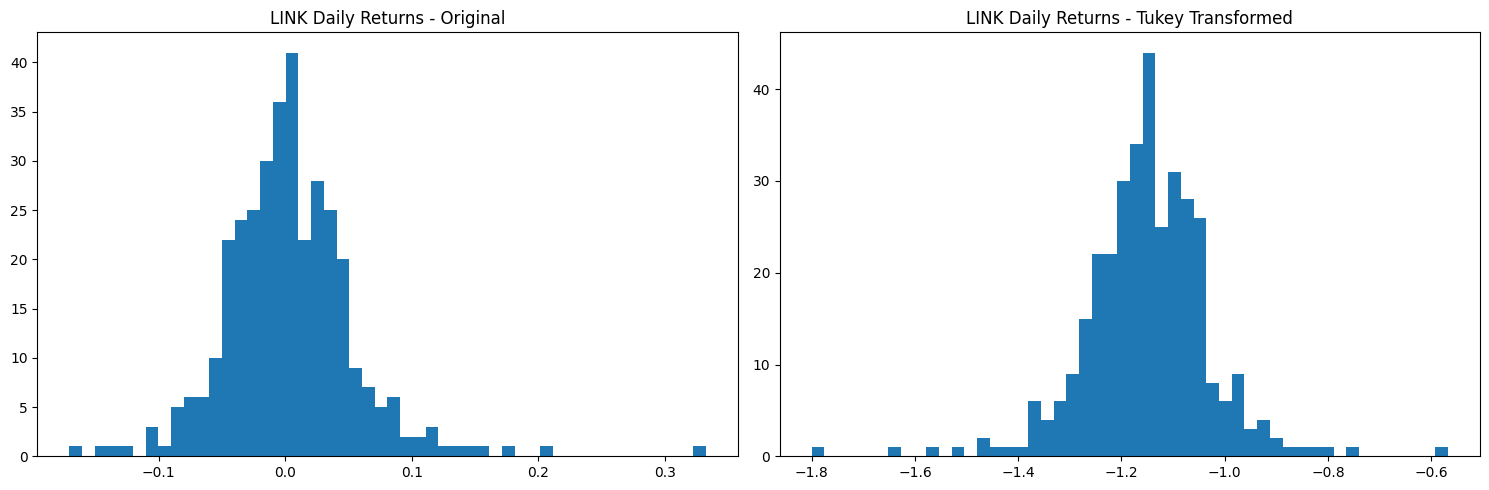

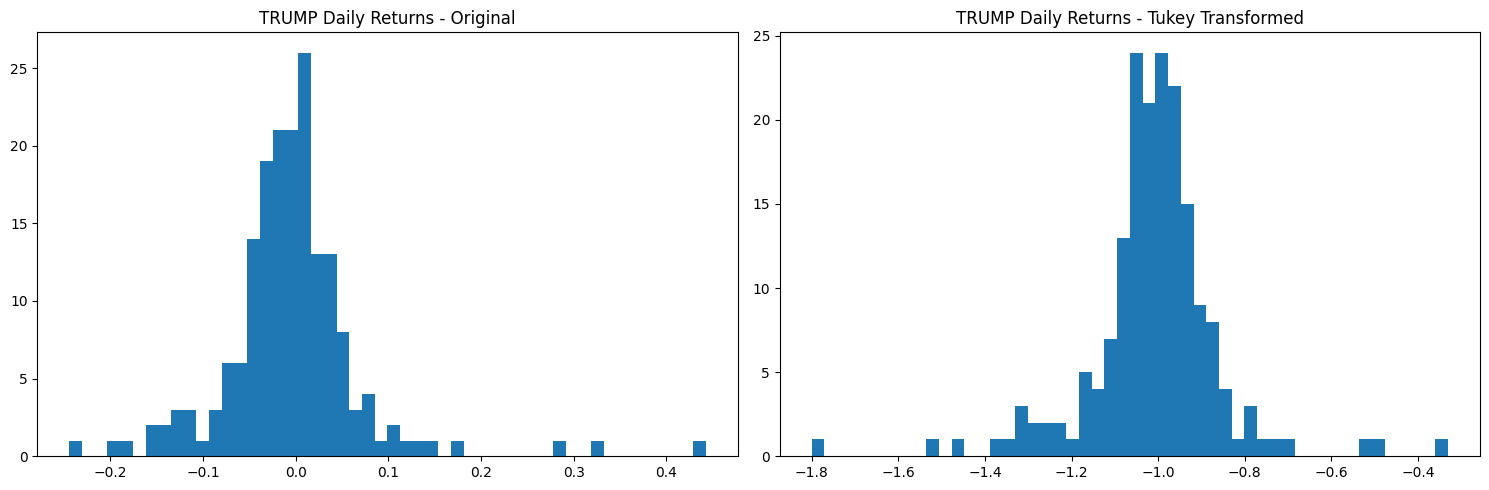

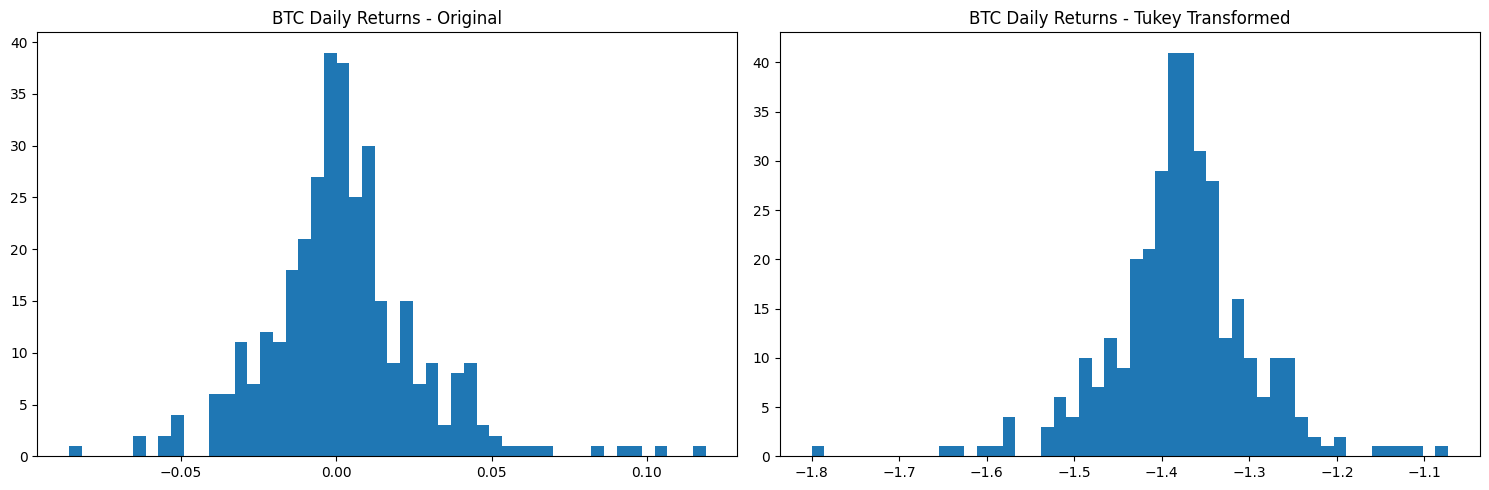

In [122]:
# Ensure daily_return exists for all coins in merged_data
for coin in merged_data['coin_type'].unique():
    mask = merged_data['coin_type'] == coin
    merged_data.loc[mask, 'daily_return'] = merged_data.loc[mask, 'close'].pct_change()

    def tukey_transform(data, lambda_value):
        if lambda_value == 0:
            return np.log(data)
        else:
            return (np.power(data, lambda_value) - 1) / lambda_value

    lambda_values = [-2, -1, -0.5, 0, 0.5, 1, 2]

    data_to_transform = merged_data.loc[mask, 'daily_return'].dropna()
    transformed_data = tukey_transform(data_to_transform - data_to_transform.min() + 0.01, 0.5)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data_to_transform, bins=50)
    plt.title(f'{coin} Daily Returns - Original')

    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=50)
    plt.title(f'{coin} Daily Returns - Tukey Transformed')

    plt.tight_layout()
    plt.show()

### Summary

In this Problem Analysis Workshop, we performed comprehensive data transformations and validation on cryptocurrency time series data for TRUMP, LINK, and BTC. Key accomplishments include:

- Converted categorical variables into dummy variables for coin types
- Converted factor variables into numeric (we did not really have any factor variables, but we did what we could with the features we had)
- Transformed calendar dates into Julian dates for time-based analysis
- Normalized numeric values using Box-Cox transformations
- Applied Tukey's Ladder of Power for handling skewed distributions


# Group Presentation 4

HELLO!

In this section, we test whether Trump-related sentiment has a significant impact on the price movements of Bitcoin (BTC) and Chainlink (LINK). We integrate political/media sentiment data with historical crypto pricing and apply dimensionality reduction techniques to refine our features before modeling. The goal is to improve predictive performance and interpretability while maintaining statistical validity.

LET'S START!

### Hypothesis Testing

**Null Hypothesis (H₀):** Trump-related sentiment has no statistically significant effect on the short-term price of BTC or LINK.

**Alternative Hypothesis (H₁):** Trump-related sentiment has a statistically significant effect on the short-term price of BTC or LINK.

We will later validate this using statistical tests and feature importance analysis in machine learning models.


### 1. Missing Values Ratio

In [123]:
missing_ratio = merged_data.isnull().mean()
filtered_columns = missing_ratio[missing_ratio < 0.2].index
df = merged_data[filtered_columns].copy()

print("Columns retained after missing value filter (<20% missing):")
print(list(filtered_columns))


Columns retained after missing value filter (<20% missing):
['timestamp', 'open', 'high', 'low', 'close', 'volume', 'coin_type', 'coin_BTC', 'coin_LINK', 'coin_TRUMP', 'days_since_epoch', 'julian_date', 'close_box_cox', 'volume_box_cox', 'daily_return']


### Missing Values Ratio
We removed features that had more than 20% missing values to ensure data integrity and avoid biases introduced by excessive imputation.


### 2. Low Variance Filter

In [124]:
from sklearn.feature_selection import VarianceThreshold

# Select numeric columns only for VarianceThreshold
numeric_df = df.select_dtypes(include=['number'])

# Remove low-variance features (threshold = 0.01)
var_filter = VarianceThreshold(threshold=0.01)
low_var_mask = var_filter.fit(numeric_df).get_support()
low_var_columns = numeric_df.columns[low_var_mask]

# Filter dataframe to keep only high-variance numeric features
df_low_var = df[low_var_columns].copy()

print("Columns retained after low variance filter (threshold=0.01):")
print(list(low_var_columns))


Columns retained after low variance filter (threshold=0.01):
['open', 'high', 'low', 'close', 'volume', 'days_since_epoch', 'julian_date', 'close_box_cox', 'volume_box_cox']


### Low Variance Filter
Features with very low variance were removed because they provide minimal discriminatory power to the predictive models.


### 3. High Correlation Filter

In [ ]:
# Create correlation matrix
corr_matrix = df_low_var.corr().abs()

# Exclude 'closing' from being dropped by removing it from the matrix before comparison
corr_matrix = corr_matrix.drop(index='close', columns='close')
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_uncorrelated = df_low_var.drop(columns=to_drop)

# Output
print("Removed highly correlated features (correlation > 0.9):")
print(f"Dropped columns: {to_drop}")
print(f"Remaining columns: {df_uncorrelated.columns.tolist()}")


Removed highly correlated features (correlation > 0.9):
Dropped columns: ['high', 'low', 'julian_date', 'close_box_cox']
Remaining columns: ['open', 'close', 'volume', 'days_since_epoch', 'volume_box_cox']


### High Correlation Filter
To avoid multicollinearity, we dropped features that had a correlation coefficient higher than 0.9 with any other feature.


### 4. PCA

In [127]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_uncorrelated), columns=['PC1', 'PC2'])

print("Applied PCA:")
print("Explained Variance Ratio of PC1 and PC2:")
print(pca.explained_variance_ratio_)

Applied PCA:
Explained Variance Ratio of PC1 and PC2:
[9.99053158e-01 9.46497686e-04]


### Principal Component Analysis (PCA)
PCA was applied to reduce dimensionality while preserving as much variance as possible. This helps visualize and simplify the dataset.


### 5. Feature Importance - Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

# Assume 'target' is the label column
X = df_uncorrelated.drop(columns=['open'])
y = df_uncorrelated['open']

rf = RandomForestRegressor()
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(5)
top_features

volume              0.749793
close               0.217114
volume_box_cox      0.018896
days_since_epoch    0.014197
dtype: float64

### Random Forest Feature Importance
We used a Random Forest model to evaluate the importance of each feature based on its contribution to predicting the target (crypto price movement).


### 6. Feature Selection – Recursive Feature Elimination

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
selector = RFE(model, n_features_to_select=5)
selector.fit(X, y)
selected_features = X.columns[selector.support_]
X_selected = X[selected_features]
X_selected.head()


c:\Users\User\miniconda3\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


,close,volume,days_since_epoch,volume_box_cox
0,10.071,2904925.76,19941.0,12.273109
1,9.489,2089119.14,19942.0,12.050861
2,10.754,1442474.69,19943.0,11.798810
3,10.541,1234926.58,19944.0,11.692346
4,10.555,754905.17,19945.0,11.352107


### Recursive Feature Elimination (RFE)
RFE helps identify the top features by recursively removing less important ones using a regression model. This step ensures only the most impactful features are retained.


## Summary

In this section, we cleaned and prepared the data by removing noisy and redundant features using several dimensionality reduction techniques. These steps reduced the risk of overfitting and improved interpretability. We now have a refined feature set ready for modeling.

Our next step will be to train predictive models (e.g., Random Forest, XGBoost) using these selected features and validate the hypothesis on whether Trump-related sentiment significantly affects BTC and LINK price fluctuations.
